<h1><b>Introduction to Fake News Prediction</b></h1>

In today's digital age, the proliferation of information through social media and online platforms has made it increasingly difficult to distinguish between genuine news and misinformation. Fake news, defined as false or misleading information presented as news, has the potential to influence public opinion, incite panic, and even affect political and economic stability. The ability to accurately detect and filter out fake news is crucial in maintaining the integrity of information.

The Fake News Prediction project aims to address this pressing issue by leveraging advanced machine learning techniques to automatically identify and classify news articles as real or fake. This project utilizes a combination of natural language processing (NLP) and machine learning algorithms to analyze textual data and detect patterns indicative of misinformation.

<h2>Importing Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


**0 is Real News**

**1 is Fake News**

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Determining whether data consist of empty values

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Filling empty values

In [7]:
df = df.fillna('')

In [8]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

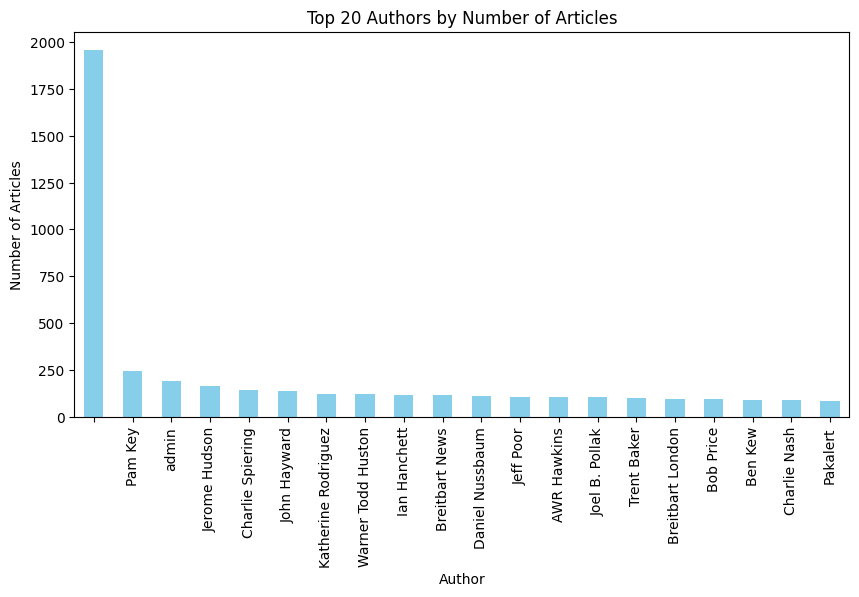

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
df['author'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Number of Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

Top 10 authors with the most articles:
 author
                       1957
Pam Key                 243
admin                   193
Jerome Hudson           166
Charlie Spiering        141
John Hayward            140
Katherine Rodriguez     124
Warner Todd Huston      122
Ian Hanchett            119
Breitbart News          118
Name: count, dtype: int64


<ipython-input-10-7e27d6f31df2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


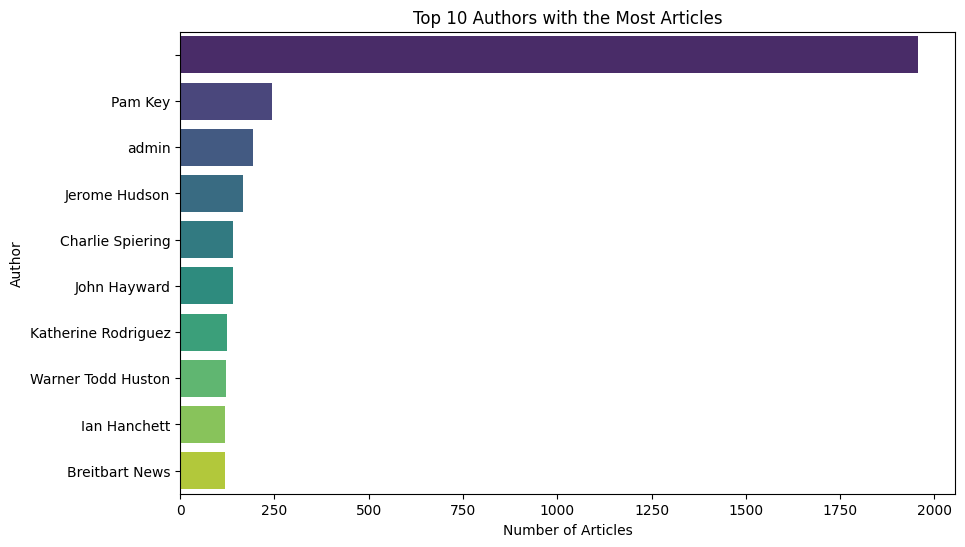

Top 10 titles with the most articles:
 title
                                                                                                                             558
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                             5
The Dark Agenda Behind Globalism And Open Borders                                                                              5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                                  4
Las imágenes libres de derechos más destacadas de la semana                                                                    4
The U.S. National Bird Is Now a Drone                                                                                          4
The Fix Is In: NBC Affiliate Accidentally Posts Election Results A Week Early: Hillary Wins Presidency 42% to Trump’s 40%      4
Michael Moore Owes Me $4.99                         

In [10]:
# Top 10 authors with the most articles
top_authors = df['author'].value_counts().head(10)
print("Top 10 authors with the most articles:\n", top_authors)

# Plot the top 10 authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors with the Most Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.show()

# Top 10 titles with the most articles
top_titles = df['title'].value_counts().head(10)
print("Top 10 titles with the most articles:\n", top_titles)

<h3>Checking for duplicate articles</h3>

In [11]:
duplicates = df.duplicated(subset=['title', 'author', 'text']).sum()
print(f"Number of duplicate articles: {duplicates}")

Number of duplicate articles: 109


<h3>Droping duplicate articles</h3>

In [12]:
data = df.drop_duplicates(subset=['title', 'author', 'text'])

In [13]:
data.shape

(20691, 5)

In [14]:
# Combining the title and text columns for better feature extraction using .loc to avoid warning
data.loc[:, 'content'] = data['text']

<ipython-input-14-70ab0083c805>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'content'] = data['text']


In [15]:
data

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [16]:
data['content']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: content, Length: 20691, dtype: object

In [17]:
X = data['content']
Y = data['label']

In [18]:
print(X)


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: content, Length: 20691, dtype: object


<h3><b>Applying Stemming on the data</b></h3>

In [19]:
port_stem = PorterStemmer()

In [20]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [22]:
data['content'] = data['content'].apply(stemming)

<ipython-input-22-1bc21bdccedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(stemming)


In [23]:
data

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl us airstrik identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper unload black celebr met donald trump el...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,green bay packer lost washington redskin week ...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,maci today grew union sever great name america...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan press...


Separating the data and label

In [24]:
X = data['content'].values
Y = data['label'].values

In [26]:
# Text preprocessing and feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

X = tfidf_vectorizer.transform(X)

In [27]:
print(X)

  (0, 108701)	0.052418251808426276
  (0, 108648)	0.020369567656400578
  (0, 107704)	0.04722134825360928
  (0, 107700)	0.10132048042353659
  (0, 107657)	0.04037837378385735
  (0, 107620)	0.012072552953292135
  (0, 106976)	0.018382411276873047
  (0, 106176)	0.018253704839037
  (0, 106088)	0.013388210004763144
  (0, 106003)	0.03115647943597495
  (0, 105927)	0.013723876884285675
  (0, 105727)	0.01258108309047407
  (0, 104888)	0.027634465007577942
  (0, 104853)	0.03350386569977399
  (0, 103857)	0.023007374226020266
  (0, 102455)	0.06976358873262478
  (0, 101772)	0.03536830894226178
  (0, 101522)	0.01749783244818621
  (0, 100755)	0.04058925101851515
  (0, 100117)	0.011834456750153814
  (0, 100107)	0.0460462582357731
  (0, 100055)	0.12152660579760964
  (0, 99907)	0.07633305017171357
  (0, 98625)	0.04215227027940213
  (0, 98062)	0.028926663730153956
  :	:
  (20690, 7405)	0.010720861419156569
  (20690, 7081)	0.028333112708615972
  (20690, 6788)	0.04017624922971538
  (20690, 6750)	0.025472892978

**Performing Hyperparameter Tuning**

In [28]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Assume X and Y are defined: X is the feature set and Y is the target variable
# Example: X = data['content'], Y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define model parameters for GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [0.1, 1, 10]
        }
    }
}

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Convert scores to a DataFrame for better visualization
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

                 model  best_score                   best_params
0                  svm    0.954507  {'C': 1, 'kernel': 'linear'}
1        random_forest    0.905088         {'n_estimators': 100}
2  logistic_regression    0.955353                     {'C': 10}


**Conclusion:**
Logistic Regression is the best model with a best score of 0.955353.


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Using the best parameters to create the final model
best_model = LogisticRegression(C=10, solver='liblinear', multi_class='auto')


best_model.fit(X_train, y_train)

#predictions on the test data
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.947330273012805
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2041
           1       0.94      0.95      0.95      2098

    accuracy                           0.95      4139
   macro avg       0.95      0.95      0.95      4139
weighted avg       0.95      0.95      0.95      4139

Confusion Matrix:
[[1918  123]
 [  95 2003]]


The model has achieved an accuracy of approximately **94%**

**Predicting The News**

In [34]:
news_text = "Your news article text here"
X_new_tfidf = tfidf_vectorizer.transform([news_text])


prediction = best_model.predict(X_new_tfidf)


if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is Fake')

The news is Fake
